Here we derive an analytic model of the fraction of the coincident microbursts observed by both spacecraft vs. one assuming a fixed scale size.

In [3]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

Here is the geometric model of the problem. The diagram below shows two spacecraft as blue cubes, separated by some distance $d$. Then for a microburst of a given radius $r$, we can show the furthest distance at which a microburst of size $r$ will be observed by both spacecraft. This case is shown with two black circles to the left and right with respect to the line that connects the two spacecraft. The center of both black circles is marked with a black dot. 

Now we find the fraction of coincident microbursts to all microbursts observed by one and not the other spacecraft.

We first look at the number of coincident microbursts. Assume that we fire N microbursts into a world with an area $A_{world}$ (that is our canvas in the following diagram). The centers of microbursts that are coincidently observed must be at most a distance $r$ from both spacecraft. Geometrically we can visualize this by tracing the center of one of the black circles as we rotate it about one of the spacecraft location. The result of this rotation are the two red circles. The red shaded area in the middle, $A_1$ is the area in which if we place a microburst center, both spacercaft will see it.

To find the number of microbursts observed by one and not the other spacecraft, consider the same picture, but now the microburst center must lie outside of $A_1$. From our earlier circle rotation we traced out the solid red curve, which coincides with the furthest that a microburst center can be and be observed by one or the other spacecraft. Thus the area of this region is $2 \pi r^2 - A_1$. 

To put it all togeather, the fraction of coincident microbursts observed by two spacecraft is given by 

$$
F = \frac{A_1}{2 \pi r^2 - A_1}
$$. The Cumulative Distribution Fuction (CDF) is the derived by assuming a distribution of microbursts e.g. a Gaussian, and calculating $F$ as a function of $d$.

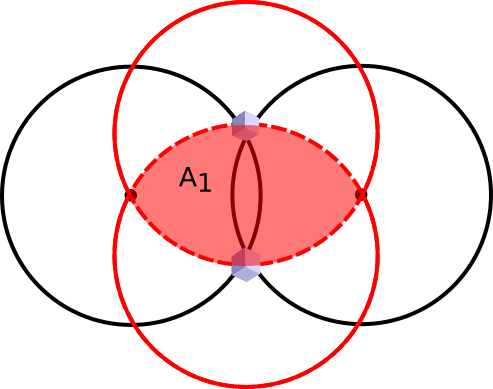

In [4]:
Image("analytic_coincident_microburst_scale_size_bounds.png")

In [27]:
A1 = lambda r, d: 2*r**2*np.arccos(d/(2*r)) - d/2*np.sqrt(4*r**2 - d**2)
F = lambda r, d: A1(r, d)/(2*np.pi*r**2 - A1(r, d))

In [28]:
d = np.arange(100)
r = np.arange(5, 25, 5)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


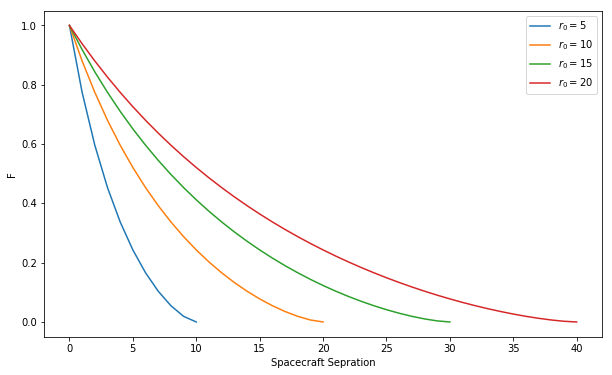

In [29]:
plt.figure(figsize=(10, 6))
for r_i in r:
    plt.plot(d, F(r_i, d), label=r'$r_0 = $'+str(r_i));
plt.legend();
plt.xlabel('Spacecraft Sepration'); plt.ylabel('F');

Another check: A1/Afull = N_A1/N. Arlo's idea to catch an error in the math that may be okay due to the ratio.